# **ANALISIS DATA STACK OVERFLOW ANNUAL DEVELOPER SURVEY UNTUK MENGIDENTIFIKASI TREN PEMROGRAMAN MENGGUNAKAN METODE EXPLORATORY DATA ANALYSIS (EDA)**

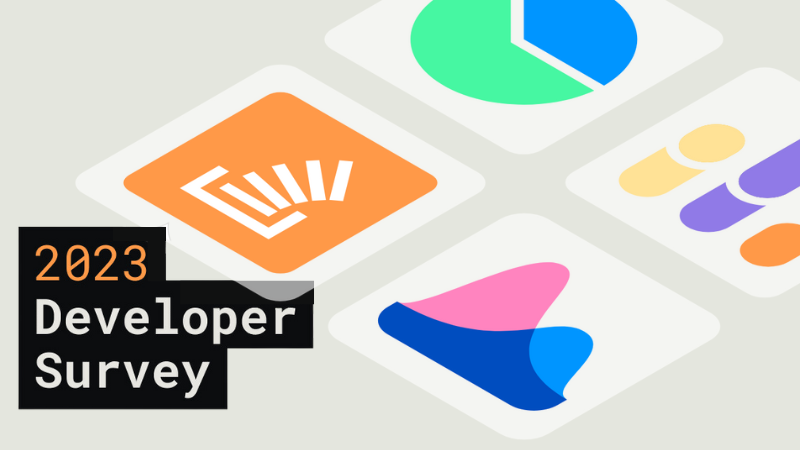

## **Menentukan Pertanyaan Bisnis**

1. Bahasa pemrograman apa yang paling populer tahun 2023?
2. Database apa yang paling populer & sering dipakai tahun 2023?
3. Cloud platforms apa yang populer & paling sering dipakai di tahun 2023?
4. Web framework apa yang populer & paling sering dipakai di tahun 2023?
5. IDE apa yang populer diantara para developers di tahun 2023?

Nantinya, hasil dari visualisasi akan dikelompokkan berdasarkan All Respondents, Professional Developers, Learning to Code, dan Other Coders

## **Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
import folium
import plotly.express as px
import textwrap

## **Mount to Google Drive**

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## **Load the Dataset**

In [4]:
survey_raw_df = pd.read_csv('/content/gdrive/MyDrive/survey_results_public.csv')
survey_raw_schema = pd.read_csv('/content/gdrive/MyDrive/survey_results_schema.csv', on_bad_lines='skip')

In [5]:
survey_raw_df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


## **List of Columns in The Dataset**

In [6]:
survey_raw_df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

Dapat terlihat bahwa penamaan kolom didapatkan dari shortcut setiap pertanyaan yang ada.

In [7]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

## **Reading a Schema File into a Data Frame**

In [8]:
schema_df = survey_raw_schema[['qname','question']]
schema_df = schema_df.set_index('qname')
schema_df.index = schema_df.index.astype(str)
survey_raw_schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   qid             142 non-null    object
 1   qname           58 non-null     object
 2   question        56 non-null     object
 3   force_resp      35 non-null     object
 4   type            41 non-null     object
 5   selector;;;;;;  38 non-null     object
dtypes: object(6)
memory usage: 6.8+ KB


In [9]:
questions_df =survey_raw_schema[['qname','question']]
questions_df

,qname,question
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,the longest running survey of software develo...,NaN
...,...,...
137,Knowledge_7,Waiting on answers to questions often causes i...
138,Knowledge_8,I feel like I have the tools and/or resources ...
139,Frequency_1,Needing help from people outside of your immed...
140,Frequency_2,Interacting with people outside of your immedi...


In [10]:
questions_df[questions_df['qname']=='Age']

,qname,question
47,Age,What is your age? *


Setelah memuat dataset, langkah selanjutnya adalah melakukan Data Prepocessing dan Cleaning.

## **Data Prepocessing & Cleaning**

## **1. Memilih Kolom Yang Relevan**

In [11]:
columns_to_keep = [
    # Demographics
    'Age',
    'EdLevel',
    'Country',
    'LearnCode',
    'YearsCode',

    # Programming experience
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'PlatformHaveWorkedWith',
    'WebframeHaveWorkedWith',
    'NEWCollabToolsHaveWorkedWith',
]

In [12]:
df_cleaned = survey_raw_df[columns_to_keep]

In [13]:
len(columns_to_keep)

10

## **2. Mengubah Nama Kolom**

In [14]:
# Renaming columns to easier names
df_cleaned.rename(columns={
    'Age': 'age',
    'EdLevel': 'education',
    'Country': 'country',
    'LearnCode': 'learning_method',
    'YearsCode': 'years_of_experience',
    'LanguageHaveWorkedWith': 'languages',
    'DatabaseHaveWorkedWith': 'databases',
    'PlatformHaveWorkedWith': 'cloud_platforms',
    'WebframeHaveWorkedWith': 'web_frameworks',
    'NEWCollabToolsHaveWorkedWith': 'ide_tools'
}, inplace=True)

# Verify the renamed columns
print(df_cleaned.columns)
print(df_cleaned)

Index(['age', 'education', 'country', 'learning_method', 'years_of_experience',
       'languages', 'databases', 'cloud_platforms', 'web_frameworks',
       'ide_tools'],
      dtype='object')
                      age                                          education  \
0         18-24 years old                                                NaN   
1         25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2         45-54 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3         25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4         25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                   ...                                                ...   
89179     25-34 years old                Associate degree (A.A., A.S., etc.)   
89180     18-24 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
89181   Prefer not to say                                     Something else   
89182  

<ipython-input-14-05cb8012625a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={


## **3. Mengatasi Missing Value**

In [15]:
missing_values = df_cleaned.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
education               1211
country                 1211
learning_method         1521
years_of_experience     1749
languages               2044
databases              15749
cloud_platforms        25556
web_frameworks         22246
ide_tools               3320
dtype: int64


Dari 10 kolom yang telah dipilih, terdapat banyak sekali missing value di tiap field. Untuk itu, kita perlu untuk melakukan proses Data Cleaning untuk membersihkan/mengisi kolom yang memiliki banyak missing value.

<Axes: >

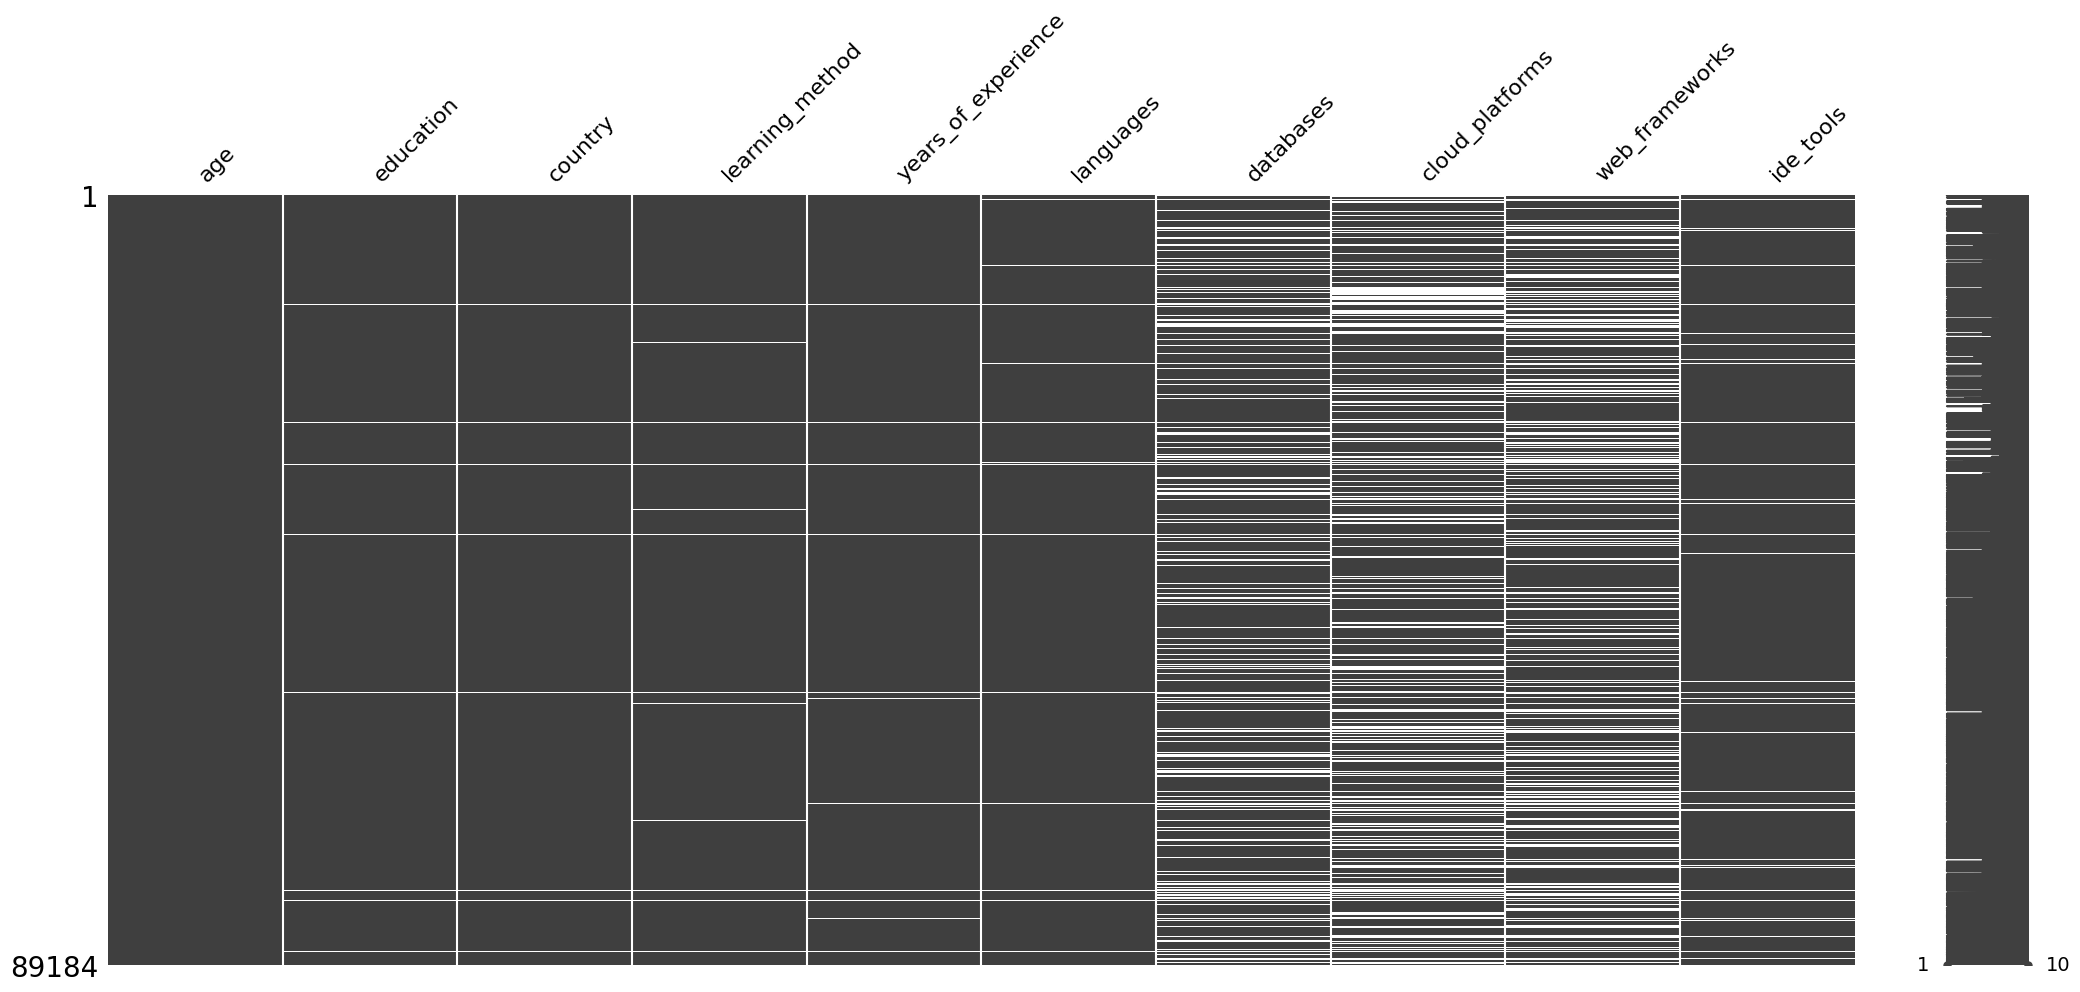

In [16]:
import missingno as msno
msno.matrix(df_cleaned)

Dari grafik di atas, dapat terlihat bahwa missing value paling banyak terdapat di 3 kolom yakni kolom DatabaseHaveWorkedWith, PlatformHaveWorkedWith, dan WebframeHaveWorkedWith.

## **Mengisi Missing Value Dengan Metode Imputasi**

In [17]:
# Definisikan kolom-kolom berdasarkan jenisnya
numerical_columns = ['years_of_experience']
categorical_columns = ['education', 'country', 'learning_method', 'languages', 'databases',
                       'cloud_platforms', 'web_frameworks', 'ide_tools']

# Konversi kolom numerik ke tipe numerik, menangani nilai non-numerik
for col in numerical_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Mengimputasi kolom numerik dengan median
for col in numerical_columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Mengimputasi kolom kategorikal dengan modus
for col in categorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

<ipython-input-17-d87c6505984c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
<ipython-input-17-d87c6505984c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-17-d87c6505984c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean

In [18]:
# Verify that there are no missing values
print(df_cleaned.isnull().sum())

age                    0
education              0
country                0
learning_method        0
years_of_experience    0
languages              0
databases              0
cloud_platforms        0
web_frameworks         0
ide_tools              0
dtype: int64


<Axes: >

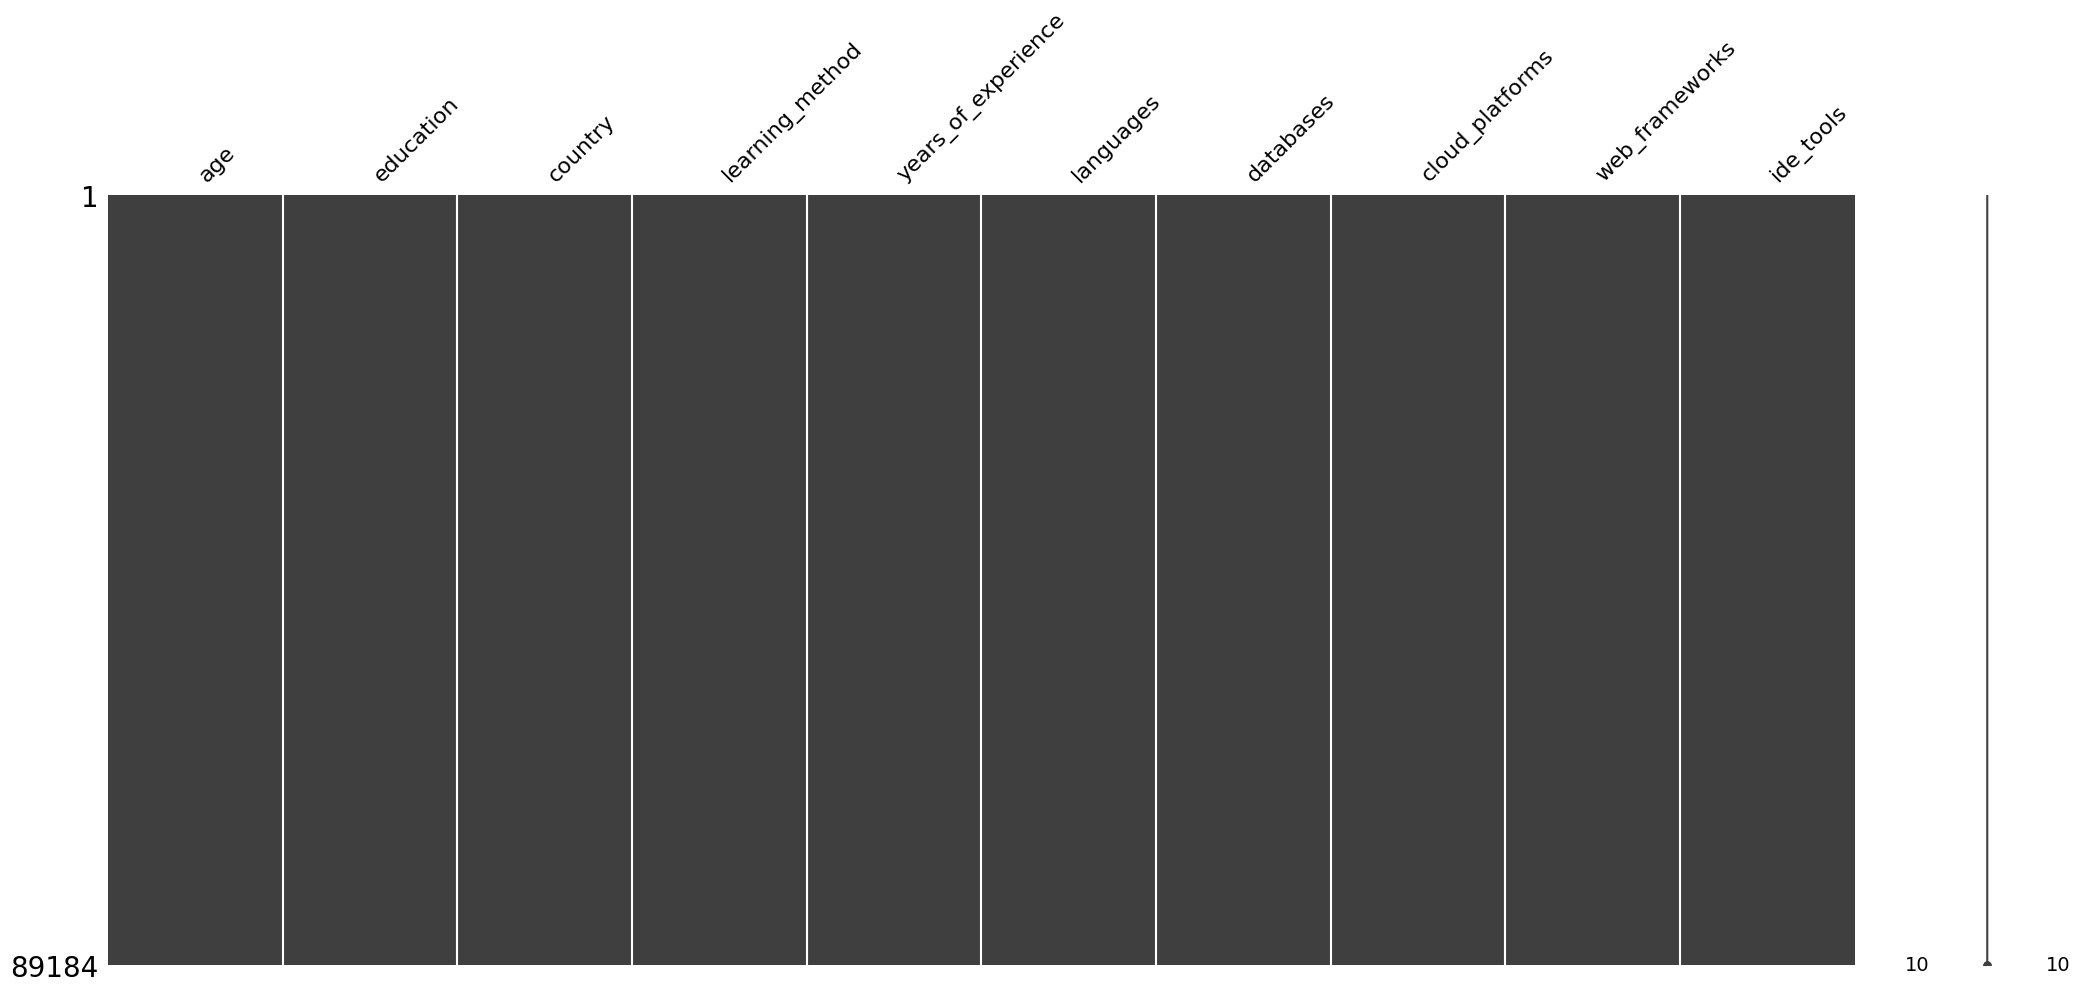

In [19]:
import missingno as msno
msno.matrix(df_cleaned)

Missing value yang ada pada data akan dibersihkan dengan menggunakan metode imputasi. Metode ini digunakan dengan cara mengisi kolom-kolom data yang tidak memiliki nilai dengan nilai median & modus dari keseluruhan data. Namun, sebelum itu, untuk data non-numerik, dikonversi menjadi numerik terlebih dahulu.

## **Data Analysis**

## **1. Grouping by Age**

In [20]:
df_cleaned.age.unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [21]:
age_counts = df_cleaned.age.value_counts().reset_index(name='count')
age_counts

,age,count
0,25-34 years old,33247
1,35-44 years old,20532
2,18-24 years old,17931
3,45-54 years old,8334
4,Under 18 years old,4128
5,55-64 years old,3392
6,65 years or older,1171
7,Prefer not to say,449


In [22]:
age_sectors = {}
for age_group, count in zip(age_counts['age'], age_counts['count']):
    # Extract rows for the current age group
    age_sector_df = df_cleaned[df_cleaned['age'] == age_group]

    # Store the age sector DataFrame in the dictionary
    age_sectors[age_group] = age_sector_df

age_18_24_df = age_sectors.get('18-24 years old',pd.DataFrame())
age_18_24_df.shape

(17931, 10)

## **2. Grouping by Years of Experience**

In [23]:
df_cleaned.years_of_experience.unique()

array([11., 18., 27., 12.,  6., 21.,  4.,  5., 20., 14., 10., 15.,  3.,
       24.,  8., 13., 16., 33., 22., 30., 32.,  7., 35., 28., 40., 17.,
       29., 19.,  9., 38., 26., 34., 25.,  2., 45., 23., 31., 43.,  1.,
       48., 41., 50., 39., 42., 37., 36., 44., 46., 49., 47.])

In [24]:
experience_counts = df_cleaned.years_of_experience.value_counts().reset_index(name='count').head(10)
experience_counts

,years_of_experience,count
0,10.0,6521
1,11.0,5589
2,5.0,5415
3,6.0,4893
4,8.0,4879
5,7.0,4800
6,4.0,4466
7,15.0,4336
8,3.0,4269
9,20.0,4021


## **3. Grouping by Education Level**

In [25]:
df_cleaned.education.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [26]:
education_counts = df_cleaned.education.value_counts().reset_index(name='count')
education_counts

,education,count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",37917
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20543
2,Some college/university study without earning ...,11753
3,"Secondary school (e.g. American high school, G...",8897
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3887
5,"Associate degree (A.A., A.S., etc.)",2807
6,Primary/elementary school,1905
7,Something else,1475


## **4. Grouping by Country**

In [27]:
df_cleaned.country.unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'India', 'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Poland', 'Lebanon', 'Lithuania',
       'Serbia', 'Cyprus', 'China', 'Bahrain',
       'Iran, Islamic Republic of...', 'Pakistan', 'Egypt',
       'Russian Federation', 'Turkey', 'Slovakia', 'Latvia', 'Greece',
       'Austria', 'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Nepal', 'Slovenia', 'Romania', 'Luxembourg', 'Indonesia',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Kenya',
       'Nomadic', 'Dominican Republic', 'Morocco', 'Uzbekistan',
       'Belarus', 'Isle of Man', 'Estonia', 'Bulgaria',
       'The f

In [28]:
country_counts = df_cleaned.country.value_counts().reset_index(name='count').head(10)
country_counts

,country,count
0,United States of America,19858
1,Germany,7328
2,India,5625
3,United Kingdom of Great Britain and Northern I...,5552
4,Canada,3507
5,France,2933
6,Poland,2435
7,Netherlands,2383
8,Australia,2078
9,Brazil,2042


## **5. Grouping by Learning Method**

In [29]:
learning_counts = df_cleaned.learning_method.value_counts().reset_index(name='count').head(10)
learning_counts

,learning_method,count
0,"Other online resources (e.g., videos, blogs, f...",6394
1,Books / Physical media;Other online resources ...,3300
2,"Other online resources (e.g., videos, blogs, f...",3070
3,Books / Physical media;Online Courses or Certi...,3024
4,Online Courses or Certification;Other online r...,2871
5,Books / Physical media;Other online resources ...,2725
6,Books / Physical media;Online Courses or Certi...,2650
7,Books / Physical media;Online Courses or Certi...,2278
8,"School (i.e., University, College, etc)",2162
9,Online Courses or Certification;On the job tra...,2104


## **6. Grouping by Programming Languages**

In [30]:
df_cleaned.languages.unique()

array(['HTML/CSS;JavaScript;TypeScript', 'HTML/CSS;JavaScript;Python',
       'Bash/Shell (all shells);Go', ...,
       'Bash/Shell (all shells);C#;C++;Cobol;Groovy;PHP;PowerShell',
       'Assembly;Bash/Shell (all shells);C;C#;Python;Rust;SQL',
       'Bash/Shell (all shells);C#;HTML/CSS;Java;JavaScript;Lua;Objective-C;PowerShell;Python;Solidity;SQL'],
      dtype=object)

In [31]:
languages_counts = df_cleaned.languages.value_counts().reset_index(name='count').head(10)
languages_counts

,languages,count
0,HTML/CSS;JavaScript;TypeScript,3531
1,Python,1132
2,HTML/CSS;JavaScript,735
3,HTML/CSS;JavaScript;PHP;SQL,718
4,C#,649
5,JavaScript;TypeScript,590
6,C#;HTML/CSS;JavaScript;SQL;TypeScript,575
7,Java,573
8,Python;SQL,460
9,C#;HTML/CSS;JavaScript;SQL,449


## **7. Grouping by Databases**

In [32]:
df_cleaned.databases.unique()

array(['PostgreSQL', 'Supabase', 'PostgreSQL;Redis', ...,
       'Cloud Firestore;Firebase Realtime Database;MariaDB;Microsoft SQL Server;MongoDB;MySQL;Oracle;PostgreSQL;SQLite',
       'Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;Redis',
       'Firebird;IBM DB2;MariaDB;Microsoft Access;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;SQLite'],
      dtype=object)

In [33]:
databases_counts = df_cleaned.databases.value_counts().reset_index(name='count').head(10)
databases_counts

,databases,count
0,PostgreSQL,20099
1,Microsoft SQL Server,3322
2,MySQL,3116
3,SQLite,2299
4,MongoDB,1663
5,PostgreSQL;SQLite,1426
6,PostgreSQL;Redis,1024
7,MariaDB;MySQL,1001
8,MySQL;SQLite,969
9,MySQL;PostgreSQL,945


## **8. Grouping by Cloud Platforms**

In [34]:
df_cleaned.cloud_platforms.unique()

array(['Amazon Web Services (AWS)',
       'Amazon Web Services (AWS);Netlify;Vercel',
       'Amazon Web Services (AWS);Google Cloud;OpenStack;VMware;Vultr',
       ..., 'Fly.io;Google Cloud;Heroku;OpenShift',
       'Colocation;Digital Ocean;Hetzner;OVH',
       'Amazon Web Services (AWS);Cloudflare;Digital Ocean;Firebase;Google Cloud;Managed Hosting;Microsoft Azure;Oracle Cloud Infrastructure (OCI);Vercel'],
      dtype=object)

In [35]:
cloud_counts = df_cleaned.cloud_platforms.value_counts().reset_index(name='count').head(10)
cloud_counts

,cloud_platforms,count
0,Amazon Web Services (AWS),35360
1,Microsoft Azure,5945
2,Google Cloud,2495
3,Amazon Web Services (AWS);Microsoft Azure,2192
4,Amazon Web Services (AWS);Google Cloud,1810
5,Firebase,1407
6,Amazon Web Services (AWS);Cloudflare,822
7,Digital Ocean,819
8,VMware,798
9,Amazon Web Services (AWS);Google Cloud;Microso...,795


## **9. Grouping by Website Frameworks**

In [36]:
df_cleaned.web_frameworks.unique()

array(['React', 'Next.js;React;Remix;Vue.js',
       'Node.js;React;Ruby on Rails;Vue.js;WordPress', ...,
       'ASP.NET;ASP.NET CORE;Blazor;jQuery;React;Ruby on Rails;WordPress',
       'AngularJS;ASP.NET;CodeIgniter;Drupal;jQuery;Laravel;Node.js;Symfony;Vue.js;WordPress',
       'Angular;AngularJS;Express;jQuery;Node.js;Nuxt.js;Spring Boot;Svelte;Vue.js'],
      dtype=object)

In [37]:
frameworks_counts = df_cleaned.web_frameworks.value_counts().reset_index(name='count').head(10)
frameworks_counts

,web_frameworks,count
0,React,24263
1,Spring Boot,1479
2,Node.js,1452
3,Node.js;React,1161
4,Flask,1069
5,WordPress,972
6,jQuery,908
7,Django,862
8,ASP.NET CORE,818
9,Express;Node.js;React,807


## **10. Grouping by IDE Tools**

In [38]:
df_cleaned.ide_tools.unique()

array(['Visual Studio Code', 'Vim;Visual Studio Code', 'Emacs;Helix', ...,
       'Atom;Eclipse;PhpStorm;Sublime Text;Vim;Visual Studio;WebStorm',
       'Android Studio;Atom;Eclipse;IntelliJ IDEA;Netbeans;Sublime Text;Visual Studio;Visual Studio Code',
       'Eclipse;IntelliJ IDEA;Nano;Notepad++;PyCharm;Vim;Visual Studio;Visual Studio Code'],
      dtype=object)

In [39]:
ide_counts = df_cleaned.ide_tools.value_counts().reset_index(name='count').head(10)
ide_counts

,ide_tools,count
0,Visual Studio Code,12074
1,Visual Studio;Visual Studio Code,3430
2,Notepad++;Visual Studio;Visual Studio Code,2167
3,IntelliJ IDEA;Visual Studio Code,1654
4,Vim;Visual Studio Code,1602
5,Neovim,999
6,IntelliJ IDEA,981
7,Notepad++;Visual Studio Code,897
8,Visual Studio,890
9,Neovim;Visual Studio Code,844


## **Data Visualization**

## **1. Grouping by Age**

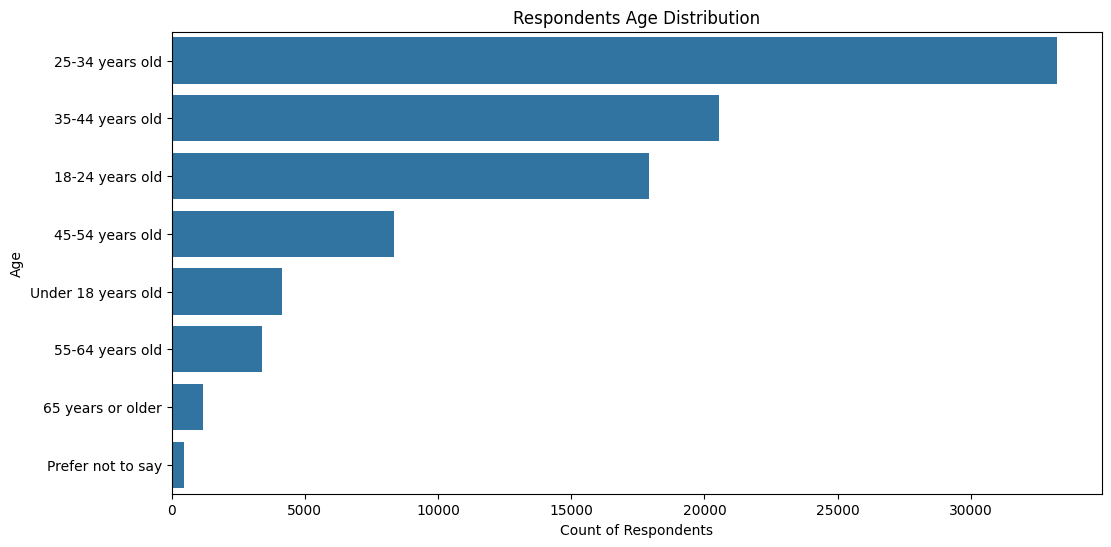

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(y='age', data=df_cleaned, order=df_cleaned['age'].value_counts().index)
plt.title('Respondents Age Distribution')
plt.xlabel('Count of Respondents')
plt.ylabel('Age')
plt.show()

## **2. Grouping by Education Level**

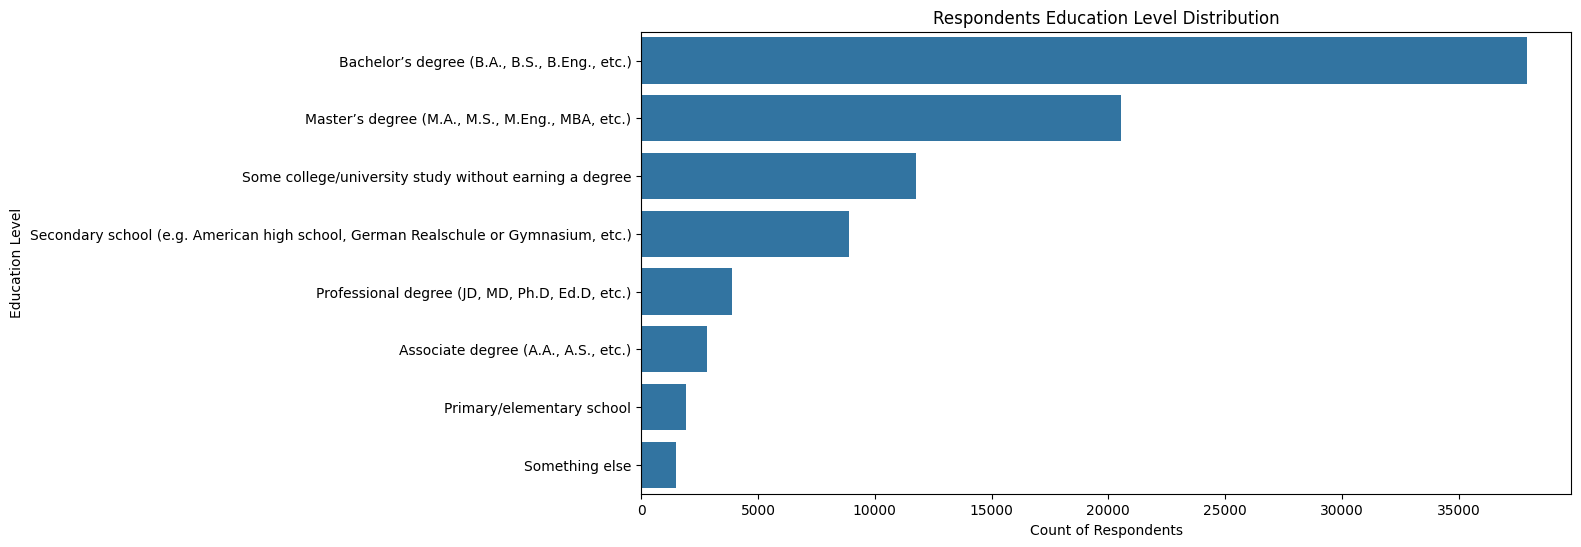

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df_cleaned, order=df_cleaned['education'].value_counts().index)
plt.title('Respondents Education Level Distribution')
plt.xlabel('Count of Respondents')
plt.ylabel('Education Level')
plt.show()

## **3. Grouping by Years of Experience**

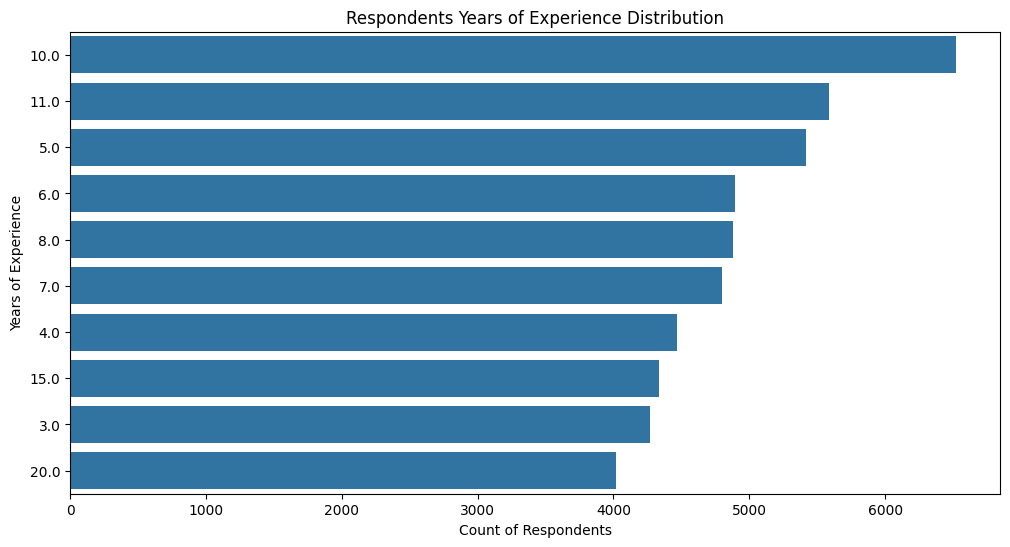

In [42]:
# Select only the top ten most frequent years_of_experience values
top_ten_years_of_exp = df_cleaned['years_of_experience'].value_counts().head(10).index

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(y='years_of_experience', data=df_cleaned, order=top_ten_years_of_exp)
plt.title('Respondents Years of Experience Distribution')
plt.xlabel('Count of Respondents')
plt.ylabel('Years of Experience')
plt.show()

## **4. Grouping by Country**

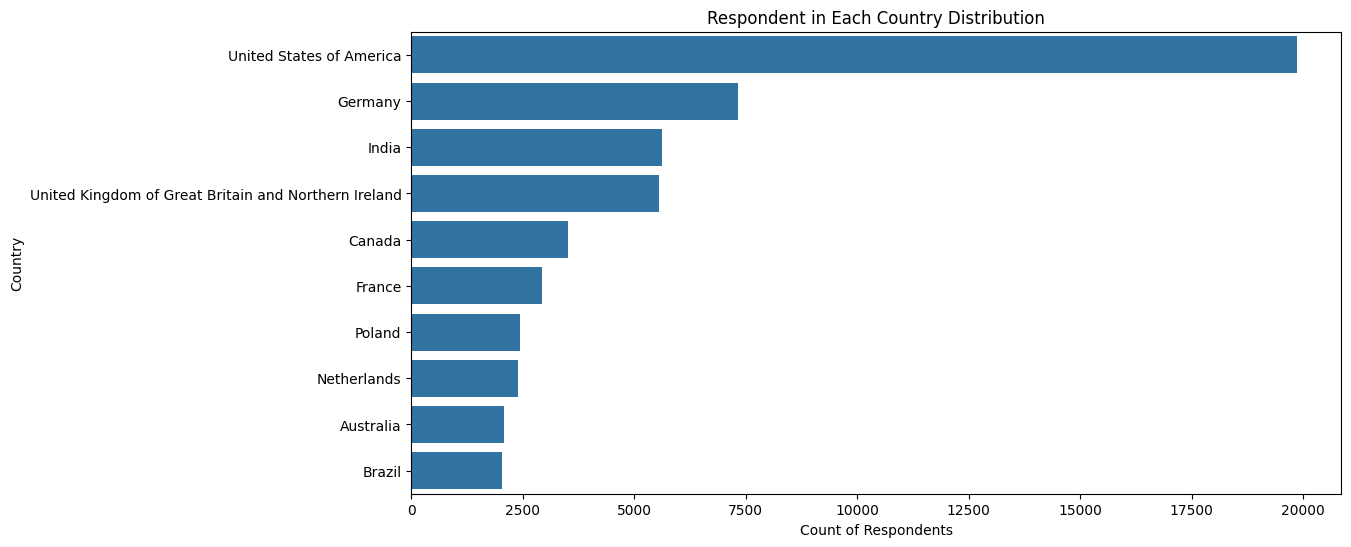

In [43]:
top_ten_country = df_cleaned['country'].value_counts().head(10).index

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=df_cleaned, order=top_ten_country)
plt.title('Respondent in Each Country Distribution')
plt.xlabel('Count of Respondents')
plt.ylabel('Country')
plt.show()

## **5. Grouping by Learning Method**

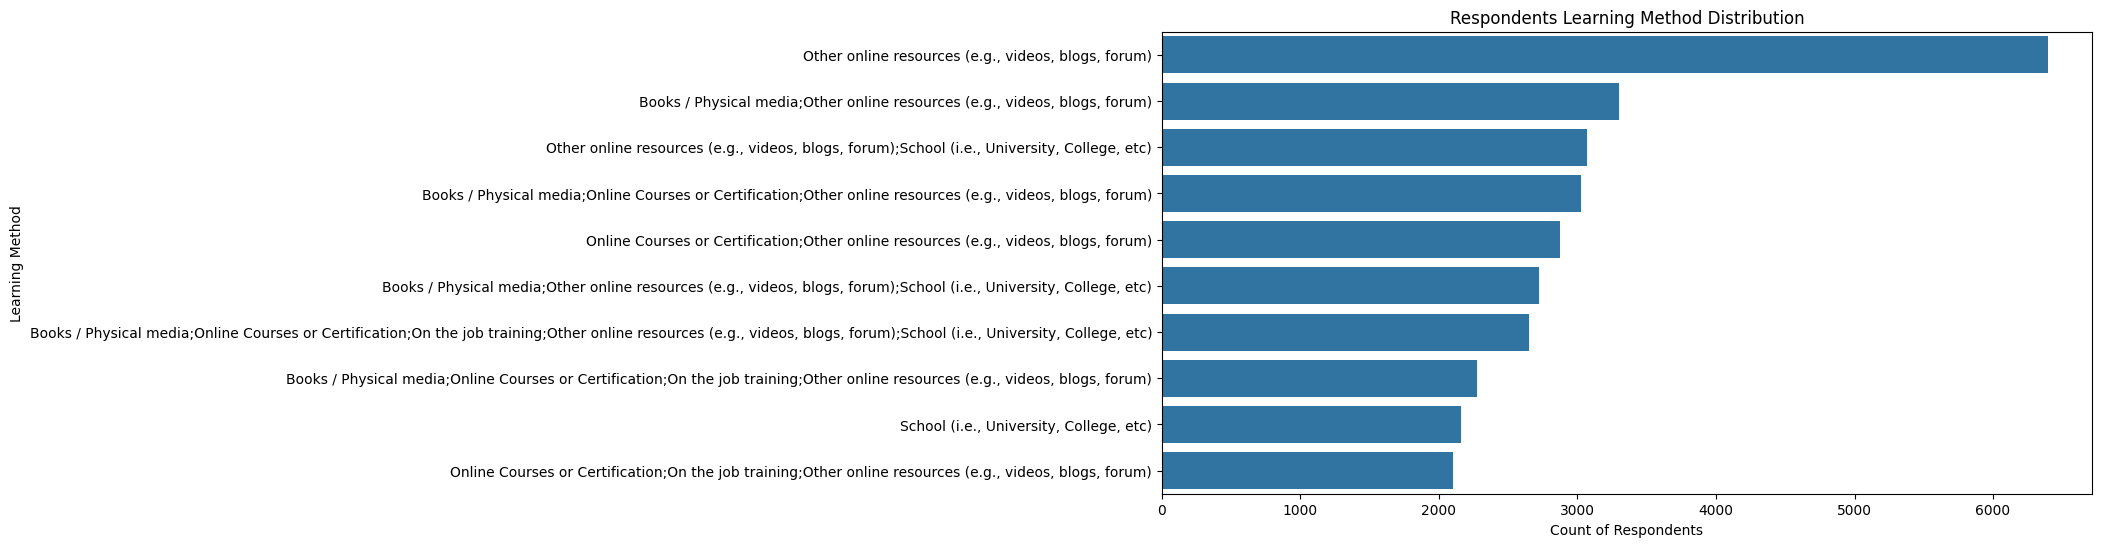

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(y='learning_method', data=df_cleaned, order=df_cleaned['learning_method'].value_counts().head(10).index)
plt.title('Respondents Learning Method Distribution')
plt.xlabel('Count of Respondents')
plt.ylabel('Learning Method')
plt.show()

## **Defining the bussiness questions**

Bahasa pemrograman apa yang paling populer tahun 2023?

Database apa yang paling populer & sering dipakai tahun 2023?

Cloud platforms apa yang populer & paling sering dipakai di tahun 2023?

Web framework apa yang populer & paling sering dipakai di tahun 2023?

IDE Tools apa yang populer diantara para developers di tahun 2023?

Nantinya, hasil dari visualisasi akan dikelompokkan berdasarkan All Respondents, Professional Developers, Learning to Code, dan Other Coders

## **1. Bahasa pemrograman apa yang paling populer di tahun 2023?**

**Question: Which programming, scripting, and markup languages have you done extensive
development work in over the past year?**

<ipython-input-45-37d8294f60c1>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_magma = plt.cm.get_cmap('magma', len(top_ten_languages))
<ipython-input-45-37d8294f60c1>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Percentage', y='Language', data=top_ten_languages, palette=colors)


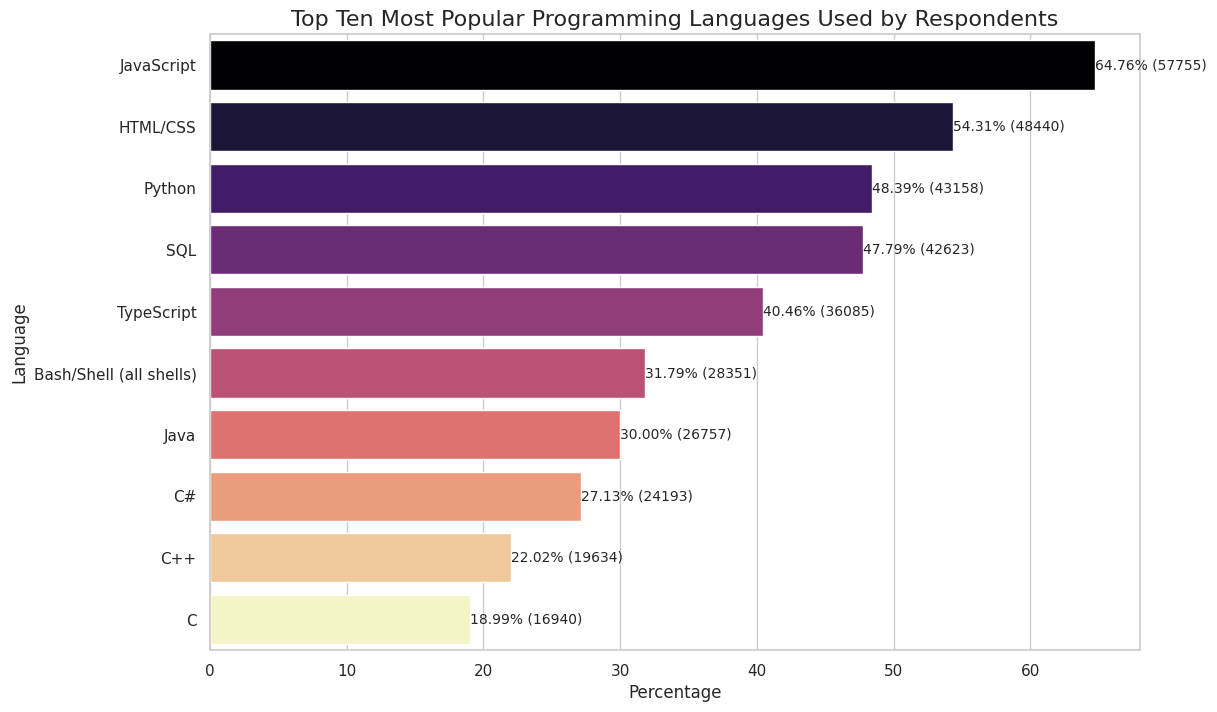

In [45]:
# Split the languages into a list
languages_list = df_cleaned['languages'].str.split(';')

# Flatten the list of lists into a single list
all_languages = [lang for sublist in languages_list.dropna() for lang in sublist]

# Create a DataFrame with the counts of each language
language_counts = pd.Series(all_languages).value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Calculate the percentage of responses for each language
total_responses = len(languages_list.dropna())
language_counts['Percentage'] = (language_counts['Count'] / total_responses) * 100

# Sort the DataFrame by percentage
language_counts = language_counts.sort_values(by='Percentage', ascending=False)

# Select only the top ten languages
top_ten_languages = language_counts.head(10)

# Define a custom Magma colormap
custom_magma = plt.cm.get_cmap('magma', len(top_ten_languages))

# Generate a list of colors from the custom colormap
colors = [custom_magma(i / (len(top_ten_languages) - 1)) for i in range(len(top_ten_languages))]

# Set Seaborn style and custom color palette
sns.set(style="whitegrid")

# Plot the results for the top ten languages using Magma colormap
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y='Language', data=top_ten_languages, palette=colors)

# Display the percentage values at the end of each bar
for index, (percentage, count) in enumerate(zip(top_ten_languages['Percentage'], top_ten_languages['Count'])):
    ax.text(percentage, index, f'{percentage:.2f}% ({count})', ha='left', va='center', fontsize=10)

# Set plot title
plt.title('Top Ten Most Popular Programming Languages Used by Respondents', fontsize=16)

# Show The Plot
plt.show()

## **2. Database apa yang paling populer & sering dipakai tahun 2023?**

**Question: Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?**

<ipython-input-46-8e6141d0551e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Percentage', y='Language', data=top_ten_languages, palette='magma')


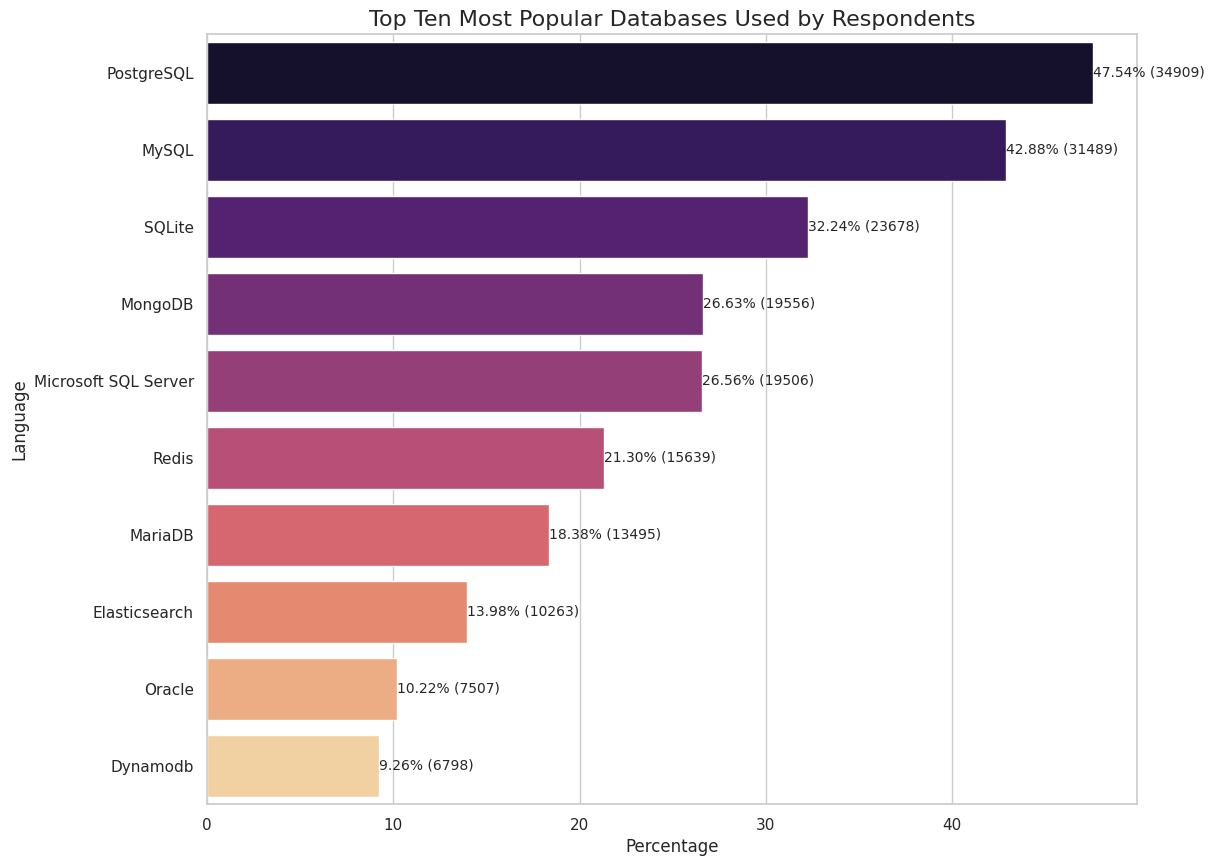

In [46]:
# Split the 'DatabaseHaveWorkedWith' column into lists
languages_list = survey_raw_df['DatabaseHaveWorkedWith'].str.split(';')

# Flatten the list of lists into a single list
all_languages = [lang for sublist in languages_list.dropna() for lang in sublist]

# Create a DataFrame with the counts of each language
language_counts = pd.Series(all_languages).value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Calculate the percentage of responses for each language
language_counts['Percentage'] = (language_counts['Count'] / len(languages_list.dropna())) * 100

# Sort the DataFrame by percentage and select the top ten
top_ten_languages = language_counts.sort_values(by='Percentage', ascending=False).head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the results for the top ten languages using a different palette
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Percentage', y='Language', data=top_ten_languages, palette='magma')

# Display the percentage values at the end of each bar
for index, (percentage, count) in enumerate(zip(top_ten_languages['Percentage'], top_ten_languages['Count'])):
    ax.text(percentage, index, f'{percentage:.2f}% ({count})', ha='left', va='center', fontsize=10)

# Set plot title
plt.title('Top Ten Most Popular Databases Used by Respondents', fontsize=16)

# Show the plot
plt.show()

## **3. Cloud platforms apa yang populer & paling sering dipakai di tahun 2023?**

**Question: Which cloud platforms have you done extensive development work in over the past year, and which do you want to work in over the next year?**

<ipython-input-47-f9bfd5ed7b47>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Percentage', y='Platform', data=top_ten_platforms, palette='magma')


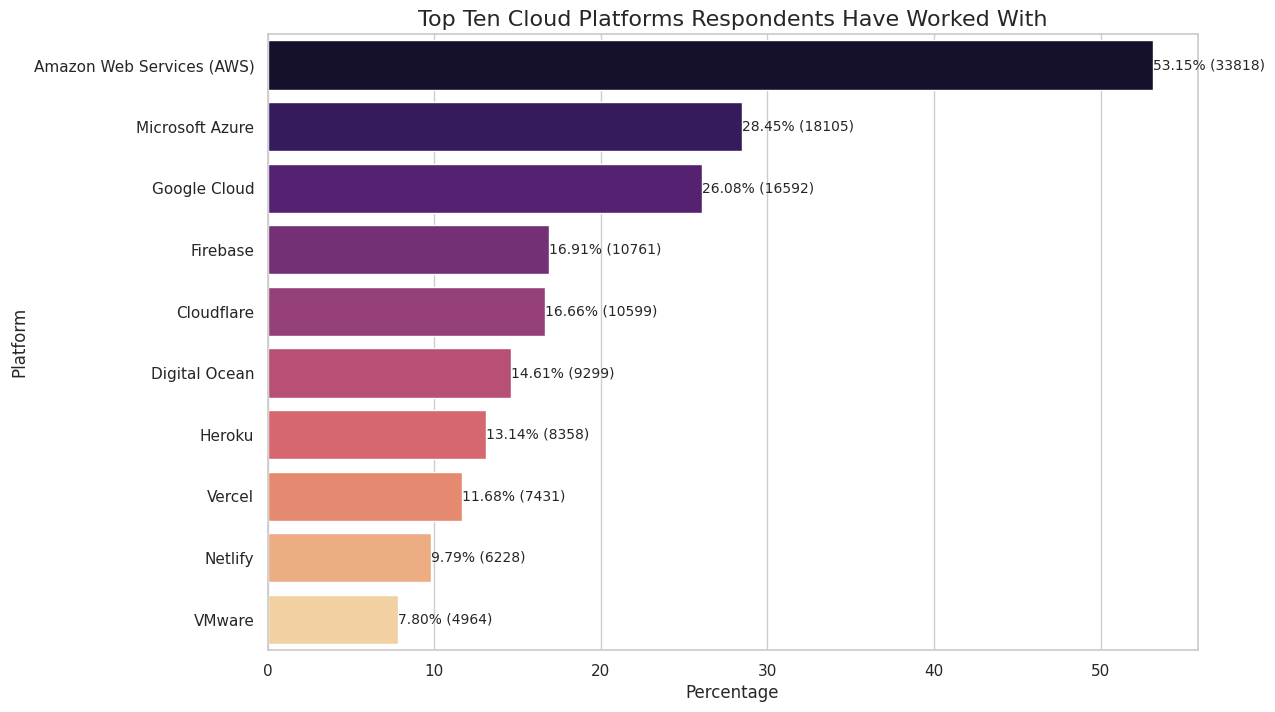

In [47]:
# Split the 'PlatformHaveWorkedWith' column into lists of platforms
platforms_list = survey_raw_df['PlatformHaveWorkedWith'].str.split(';')

# Flatten the list of lists into a single list
all_platforms = [platform for sublist in platforms_list.dropna() for platform in sublist]

# Create a DataFrame with the counts of each platform
platform_counts = pd.Series(all_platforms).value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']

# Calculate the percentage of responses for each platform
platform_counts['Percentage'] = (platform_counts['Count'] / len(platforms_list.dropna())) * 100

# Sort the DataFrame by percentage
platform_counts = platform_counts.sort_values(by='Percentage', ascending=False)

# Filter the DataFrame to include only the top ten platforms
top_ten_platforms = platform_counts.head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the results for the top ten platforms using the 'magma' palette
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y='Platform', data=top_ten_platforms, palette='magma')

# Display the percentage values at the end of each bar
for index, (percentage, count) in enumerate(zip(top_ten_platforms['Percentage'], top_ten_platforms['Count'])):
    ax.text(percentage, index, f'{percentage:.2f}% ({count})', ha='left', va='center', fontsize=10)

# Set plot title
plt.title('Top Ten Cloud Platforms Respondents Have Worked With', fontsize=16)

# Show the plot
plt.show()

## **4. Web framework apa yang populer & paling sering dipakai di tahun 2023?**

**Question: Which other frameworks and libraries have you done extensive development work in over the past year, and which do you want to work in over the next year?**

<ipython-input-48-28c53ea55b5c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Percentage', y='WebFrame', data=top_ten_webframes, palette='magma')


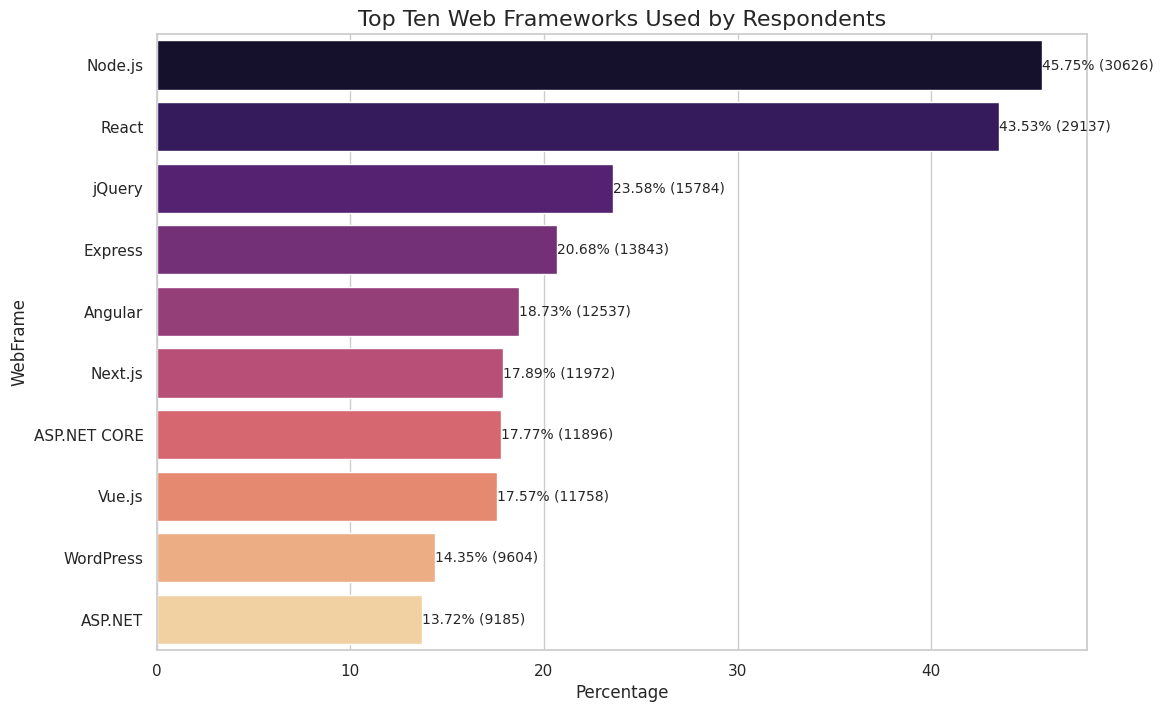

In [48]:
# Split the 'WebframeHaveWorkedWith' column into lists of web frameworks
webframe_list = survey_raw_df['WebframeHaveWorkedWith'].str.split(';')

# Flatten the list of lists into a single list
all_webframes = [frame for sublist in webframe_list.dropna() for frame in sublist]

# Create a DataFrame with the counts of each web framework
webframe_counts = pd.Series(all_webframes).value_counts().reset_index()
webframe_counts.columns = ['WebFrame', 'Count']

# Calculate the percentage of responses for each web framework
webframe_counts['Percentage'] = (webframe_counts['Count'] / len(webframe_list.dropna())) * 100

# Sort the DataFrame by percentage
webframe_counts = webframe_counts.sort_values(by='Percentage', ascending=False)

# Filter the DataFrame to include only the top ten web frameworks
top_ten_webframes = webframe_counts.head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the results for the top ten web frameworks using the 'viridis' palette
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y='WebFrame', data=top_ten_webframes, palette='magma')

# Display the percentage values at the end of each bar
for index, (percentage, count) in enumerate(zip(top_ten_webframes['Percentage'], top_ten_webframes['Count'])):
    ax.text(percentage, index, f'{percentage:.2f}% ({count})', ha='left', va='center', fontsize=10)

# Set plot title
plt.title('Top Ten Web Frameworks Used by Respondents', fontsize=16)

# Show the plot
plt.show()

## **5. IDE Tools apa yang populer diantara para developers di tahun 2023?**

**Question: Which developer tools for compiling, building and testing have you done extensive development work in over the past year, and which do you want to work in over the next year?**

<ipython-input-49-0a476c85364a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Percentage', y='Language', data=top_ten_languages, palette='magma')


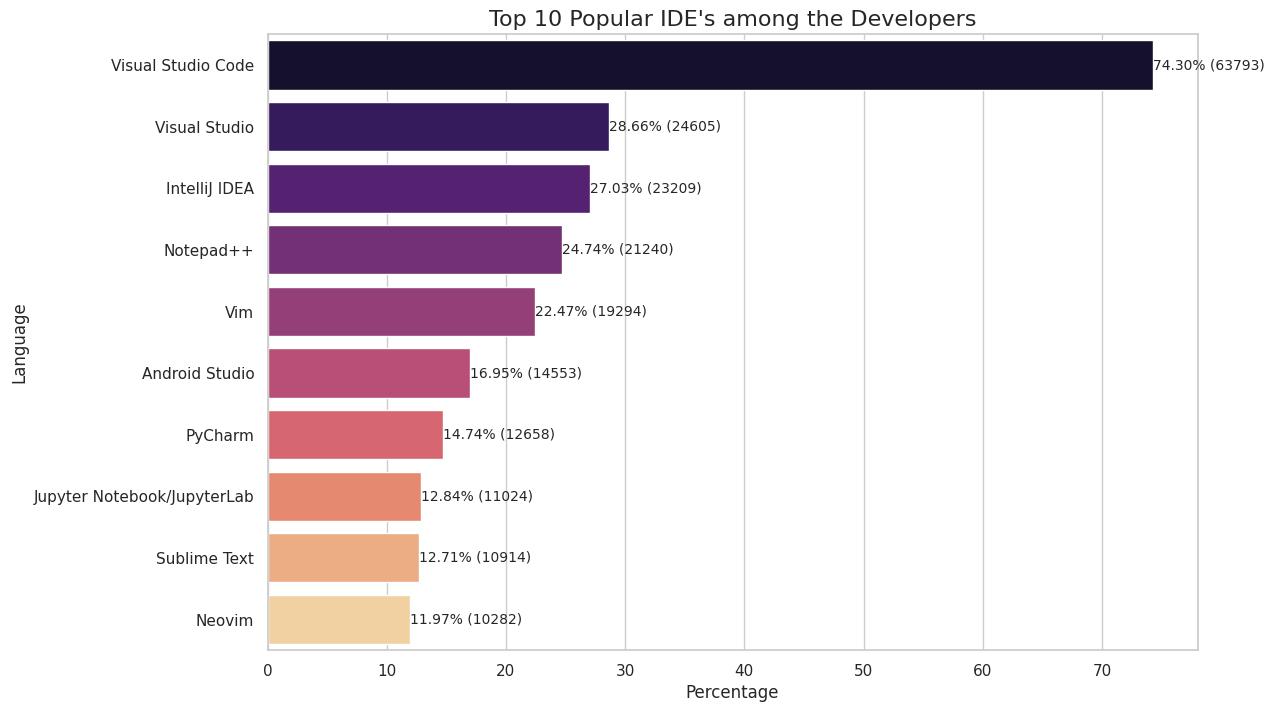

In [49]:
# Misalnya survey_raw_df sudah ada dan berisi kolom 'NEWCollabToolsHaveWorkedWith'
# Membagi nilai kolom 'NEWCollabToolsHaveWorkedWith' menjadi daftar berdasarkan pemisah ';'
languages_list = survey_raw_df['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Meratakan daftar ke dalam satu daftar tunggal
all_languages = [lang for sublist in languages_list.dropna() for lang in sublist]

# Membuat DataFrame dengan jumlah masing-masing bahasa
language_counts = pd.Series(all_languages).value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Menghitung persentase respon untuk setiap bahasa
language_counts['Percentage'] = (language_counts['Count'] / len(languages_list.dropna())) * 100

# Mengurutkan DataFrame berdasarkan persentase
language_counts = language_counts.sort_values(by='Percentage', ascending=False)

# Memilih 10 bahasa teratas
top_ten_languages = language_counts.head(10)

# Mengatur gaya Seaborn
sns.set(style="whitegrid")

# Membuat plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y='Language', data=top_ten_languages, palette='magma')

# Menampilkan nilai persentase di akhir setiap batang
for index, (percentage, count) in enumerate(zip(top_ten_languages['Percentage'], top_ten_languages['Count'])):
    ax.text(percentage, index, f'{percentage:.2f}% ({count})', ha='left', va='center', fontsize=10)

# Menetapkan judul plot
plt.title("Top 10 Popular IDE's among the Developers", fontsize=16)

# Menampilkan plot
plt.show()
